## Problem Statement:
    
        An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
        The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
        X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Proposed Steps:
1. Data Import and Inspection
    - Importing libraries
    - Import dataset
    - Basic data inspection
2. Data Cleaning and Preparation
    - Handling NULL values
    - EDA - Univariate, Bi-variate and Multivariate analysis
    - One hot encoding
3. Test Train split
4. Feature scaling
5. Build model
    - Feature selection using RFE
    - Drop a variable and re-build the model
6. Make predictions & Metrics on Train set
7. Make predictions on Test set
8. Metrics on Test set
9. Conclusion

# 1. Data Import & Inspection

## 1.1 Importing libraries

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np

# To perform visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To scale the data
from sklearn.preprocessing import StandardScaler

# To perform K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# To split train and test dataset
from sklearn.model_selection import train_test_split

# To build model
import statsmodels.api as sm

# To check the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To calculate precision_score, recall_score 
from sklearn.metrics import precision_score, recall_score

# To plot precision_recall_curve 
from sklearn.metrics import precision_recall_curve

In [7]:
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1.2 Importing Dataset

In [8]:
# working dataset
leads_base= pd.read_csv('/Users/macbook/Documents/Data Science/Machine Learning/Logistic Regression Assignment/Lead Scoring Assignment/Leads.csv')
leads_base.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# check for duplicates
leads_base[leads_base.duplicated(keep = False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## 1.3 Basic Data Inspection

In [10]:
leads_base.shape

(9240, 37)

In [11]:
leads_base.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [12]:
leads_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [13]:
# removing column name spaces
leads_base.columns = [c.replace(' ', '_') for c in leads_base.columns]
leads_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    9240 non-null   object 
 1   Lead_Number                                    9240 non-null   int64  
 2   Lead_Origin                                    9240 non-null   object 
 3   Lead_Source                                    9204 non-null   object 
 4   Do_Not_Email                                   9240 non-null   object 
 5   Do_Not_Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total_Time_Spent_on_Website                    9240 non-null   int64  
 9   Page_Views_Per_Visit                           9103 

In [14]:
leads_base.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,What_is_your_current_occupation,What_matters_most_to_you_in_choosing_a_course,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Tags,Lead_Quality,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# 2. Data Cleaning & Preparation

## 2.1 Handling NULL values

In [15]:
# Display the list of columns and number of missing rows in descending order
leads_base.isna().sum().sort_values(ascending=False).head(40)

Lead_Quality                                     4767
Asymmetrique_Profile_Score                       4218
Asymmetrique_Activity_Score                      4218
Asymmetrique_Profile_Index                       4218
Asymmetrique_Activity_Index                      4218
Tags                                             3353
What_matters_most_to_you_in_choosing_a_course    2709
Lead_Profile                                     2709
What_is_your_current_occupation                  2690
Country                                          2461
How_did_you_hear_about_X_Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page_Views_Per_Visit                              137
Last_Activity                                     103
Lead_Source                                        36
Do_Not_Email                                        0
Do_Not_Call                 

In [16]:
# Checking the percentage of missing values
round(100*(leads_base.isnull().sum()/len(leads_base.index)).sort_values(ascending=False).head(40), 2)

Lead_Quality                                     51.59
Asymmetrique_Profile_Score                       45.65
Asymmetrique_Activity_Score                      45.65
Asymmetrique_Profile_Index                       45.65
Asymmetrique_Activity_Index                      45.65
Tags                                             36.29
What_matters_most_to_you_in_choosing_a_course    29.32
Lead_Profile                                     29.32
What_is_your_current_occupation                  29.11
Country                                          26.63
How_did_you_hear_about_X_Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Cal

In [17]:
# Dropping the columns 'Prospect ID' and 'Lead Number' as there is no effect of these colums on model prediction
leads_base = leads_base.drop('Prospect_ID', axis=1)
leads_base = leads_base.drop('Lead_Number', axis=1)

#### Lead_Source

In [18]:
#Finding the count of values from each type of Lead Source and which source gives most leads
leads_base['Lead_Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
NC_EDM                  1
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
blog                    1
WeLearn                 1
Name: Lead_Source, dtype: int64

In [19]:
#Finding the mode for the lead_source column- lead_mode
leads_base['Lead_Source'].mode()

0    Google
dtype: object

In [20]:
#Filling the missing values in the Lead Source column with the mode of the variable 
leads_base['Lead_Source'].fillna(leads_base['Lead_Source'].mode()[0],inplace=True)
leads_base['Lead_Source'].isnull().sum()

0

#### TotalVisits

In [21]:
# median of the Total Visits - The total number of visits made by the customer on the website.
leads_base['TotalVisits'].median()

3.0

In [22]:
#Filling in the missing values in the Total Visits column with the median value of the Total Visits column
leads_base['TotalVisits'] = leads_base['TotalVisits'].fillna(leads_base['TotalVisits'].median())
leads_base['TotalVisits'].isnull().sum()

0

#### Page_Views_Per_Visit

In [23]:
#Find the mean of Page Views Per Visit column 
leads_base['Page_Views_Per_Visit'].mean()

2.3628199494672093

In [24]:
#Filling in the missing values in the Page Views Per Visit column with the mean value
leads_base['Page_Views_Per_Visit'] = leads_base['Page_Views_Per_Visit'].fillna(leads_base['Page_Views_Per_Visit'].mean())
leads_base['Page_Views_Per_Visit'].isnull().sum()

0

#### Last_Activity

In [25]:
#Finding the (most common) mode value of Last activity performed by the customer
leads_base['Last_Activity'].mode()

0    Email Opened
dtype: object

#### Country

In [26]:
leads_base.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Sweden                     3
Asia/Pacific Region        2
Ghana                      2
Bangladesh                 2
Italy                      2
Philippines                2
Belgium                    2
China                      2
Uganda                     2
Netherlands                2
Vietnam                    1
Indonesia                  1
Switzerland                1
Malaysia                   1
Sri Lanka                  1
Kenya                      1
Denmark       

In [27]:
#Finding out the value India in the Country Data vs other values
(leads_base['Country']!='India').value_counts()

False    6492
True     2748
Name: Country, dtype: int64

In [28]:
#Finding the null values in country columns
leads_base['Country'] = leads_base['Country'].fillna('India')
leads_base['Country'].isnull().sum()

0

#### Specialization

In [29]:
#Observing the count of data items in the Specialization column - The industry domain in which the customer worked before.
leads_base['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
#Filling in the missing values in the Specialization column with the value 'Select' - This value is equivalent to a Null selection
leads_base['Specialization'] = leads_base['Specialization'].fillna('Select')
leads_base['Specialization'].isnull().sum()

0

#### How_did_you_hear_about_X_Education

In [31]:
#Finding the value counts in  How did you hear about X Education column 
leads_base['How_did_you_hear_about_X_Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How_did_you_hear_about_X_Education, dtype: int64

In [32]:
#Filling in the missing values in the How did you hear about X Education column with the value 'Select' - This value is equivalent to a Null selection
leads_base['How_did_you_hear_about_X_Education'] = leads_base['How_did_you_hear_about_X_Education'].fillna('Select')
leads_base['How_did_you_hear_about_X_Education'].isnull().sum()

0

#### What_is_your_current_occupation

In [33]:
leads_base['What_is_your_current_occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What_is_your_current_occupation, dtype: int64

In [34]:
# count of data items in the What is your current occupation column 
#Filling in the missing values in the What is your current occupation column with the value 'Not Provided' - This value is equivalent to a Null selection
leads_base['What_is_your_current_occupation'] = leads_base['What_is_your_current_occupation'].fillna('Not Provided')
leads_base['What_is_your_current_occupation'].isnull().sum()

0

#### What_matters_most_to_you_in_choosing_a_course

In [35]:
##Observing the count of data items in the What matters most to you in choosing a course column 
leads_base['What_matters_most_to_you_in_choosing_a_course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

In [36]:
#Dropping the What matters most to you in choosing a course column
leads_base = leads_base.drop(['What_matters_most_to_you_in_choosing_a_course'],1)

#### Tags

In [37]:
#Checking the most frequent value in the Tags column - Tags assigned to customers indicating the current status of the lead.
leads_base['Tags'].mode()

0    Will revert after reading the email
dtype: object

In [38]:
#Filling in the missing values in the Tags column with the value 'Will revert after reading the email' 
leads_base['Tags'] = leads_base['Tags'].fillna('Will revert after reading the email')

#### Dropping the columns having null values more than 30%

In [39]:
#Dropping the columns having null values more than 30%
leads_base = leads_base.drop('Lead_Quality', axis=1)
leads_base = leads_base.drop('Lead_Profile', axis=1)
leads_base = leads_base.drop('City', axis=1)
leads_base = leads_base.drop('Asymmetrique_Profile_Index', axis=1)
leads_base = leads_base.drop('Asymmetrique_Activity_Index', axis=1)
leads_base = leads_base.drop('Asymmetrique_Activity_Score', axis=1)
leads_base = leads_base.drop('Asymmetrique_Profile_Score', axis=1)

#### What_is_your_current_occupation

In [40]:
leads_base['What_is_your_current_occupation'].value_counts()

Unemployed              5600
Not Provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What_is_your_current_occupation, dtype: int64

In [41]:
#Filling in the missing values in the What is your current occupation column with the value 'Not Provided' - This value is equivalent to a Null selection
leads_base['What_is_your_current_occupation'] = leads_base['What_is_your_current_occupation'].fillna('Not Provided')
leads_base['What_is_your_current_occupation'].isnull().sum()

0

#### Last_Activity

In [42]:
#Finding the mode(most common) value of Last activity performed by the customer
leads_base['Last_Activity'].mode()

0    Email Opened
dtype: object

In [43]:
#Filling in the missing values in the Lead Activity column with the mode value of Lead Activity column
leads_base['Last_Activity'] = leads_base['Last_Activity'].fillna('Email Opened')
leads_base['Last_Activity'].isnull().sum()

0

In [44]:
# Checking the percentage of missing values
round(100*(leads_base.isnull().sum()/len(leads_base.index)).sort_values(ascending=False).head(40), 2)

Last_Notable_Activity                       0.0
What_is_your_current_occupation             0.0
Lead_Source                                 0.0
Do_Not_Email                                0.0
Do_Not_Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total_Time_Spent_on_Website                 0.0
Page_Views_Per_Visit                        0.0
Last_Activity                               0.0
Country                                     0.0
Specialization                              0.0
How_did_you_hear_about_X_Education          0.0
Search                                      0.0
A_free_copy_of_Mastering_The_Interview      0.0
Magazine                                    0.0
Newspaper_Article                           0.0
X_Education_Forums                          0.0
Newspaper                                   0.0
Digital_Advertisement                       0.0
Through_Recommendations                 

In [45]:
leads_base.shape

(9240, 27)

In [46]:
leads_base.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,What_is_your_current_occupation,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [47]:
leads_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead_Origin                               9240 non-null   object 
 1   Lead_Source                               9240 non-null   object 
 2   Do_Not_Email                              9240 non-null   object 
 3   Do_Not_Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total_Time_Spent_on_Website               9240 non-null   int64  
 7   Page_Views_Per_Visit                      9240 non-null   float64
 8   Last_Activity                             9240 non-null   object 
 9   Country                                   9240 non-null   object 
 10  Specialization                      

### 2.2 Checking for Outliers

In [48]:
#Finding the percentiles for the leads_base 
leads_base.describe(percentiles = [.25,.5,.75,.95,.99])

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.362820
std,0.486714,4.819024,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000
max,1.000000,251.000000,2272.000000,55.000000


In [49]:
#Checking the names of columns
leads_base.columns

Index(['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity', 'Country', 'Specialization', 'How_did_you_hear_about_X_Education', 'What_is_your_current_occupation', 'Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper', 'Digital_Advertisement', 'Through_Recommendations', 'Receive_More_Updates_About_Our_Courses', 'Tags', 'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content', 'I_agree_to_pay_the_amount_through_cheque', 'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'], dtype='object')

### 2.4 Analysing Converted column

In [50]:
#Analyse the percentiles leaving converted column as its a target column
lead_percentiles = leads_base.columns[5:8]
for i in enumerate(lead_percentiles):
    print(i)

(0, 'TotalVisits')
(1, 'Total_Time_Spent_on_Website')
(2, 'Page_Views_Per_Visit')


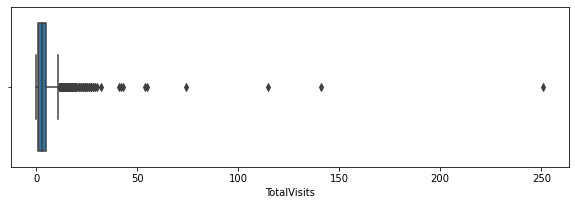

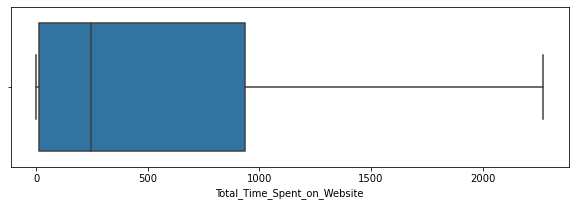

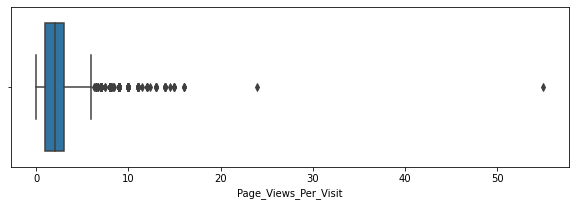

In [51]:
#Box plot for the above filtered columns
lead_percentiles = leads_base.columns[5:8]
for i in enumerate(lead_percentiles):
    plt.figure(figsize = (10,10))
    plt.subplot(3,1, i[0]+1)
    sns.boxplot(leads_base[i[1]])

Insights:Total visits and page_views_per_visit has outliers from the above box plots

In [52]:
#Removing the rows where the Total Visits are more than 17
leads_base = leads_base[(leads_base.TotalVisits <= 17) ]

#Removing the rows where the Page Views Per Visit are more than 9
leads_base = leads_base[(leads_base['Page_Views_Per_Visit'] <= 9)]

In [53]:
#Checking the percentiles again
leads_base.describe(percentiles = [.25,.5,.75,.95,.99])

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9090.000000,9090.000000,9090.000000,9090.000000
mean,0.384488,3.140924,484.243784,2.268304
std,0.486501,2.881884,547.243973,1.880919
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,4.000000,930.000000,3.000000
95%,1.000000,9.000000,1558.000000,6.000000
99%,1.000000,13.000000,1840.110000,8.000000
max,1.000000,17.000000,2272.000000,9.000000


### 2.5 Analysing numerical columns

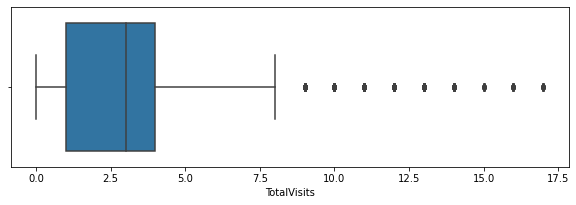

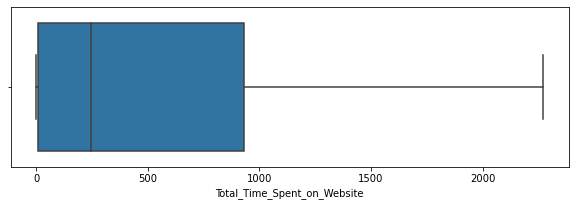

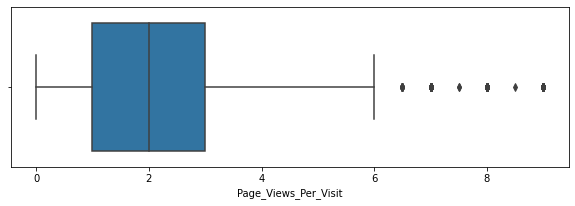

In [54]:
#Making boxplots for the numerical feature columns
lead_percentiles = leads_base.columns[5:8]
for i in enumerate(lead_percentiles):
    plt.figure(figsize = (10,10))
    plt.subplot(3,1, i[0]+1)
    sns.boxplot(leads_base[i[1]])

### 2.6  Percentage of data retained after data cleaning

In [55]:
lead_percentile_data = round(100*(len(leads_base)/9240),2)
print(lead_percentile_data)

98.38


After cleaning 98% of data has been retained which is good for proceeding with the analysis

In [56]:
#checking the shape of reatined dataset
leads_base.shape

(9090, 27)

### 2.7 EDA

#### 2.7.1 Univariate Analsyis

In [57]:
leads_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead_Origin                               9090 non-null   object 
 1   Lead_Source                               9090 non-null   object 
 2   Do_Not_Email                              9090 non-null   object 
 3   Do_Not_Call                               9090 non-null   object 
 4   Converted                                 9090 non-null   int64  
 5   TotalVisits                               9090 non-null   float64
 6   Total_Time_Spent_on_Website               9090 non-null   int64  
 7   Page_Views_Per_Visit                      9090 non-null   float64
 8   Last_Activity                             9090 non-null   object 
 9   Country                                   9090 non-null   object 
 10  Specialization                      

In [58]:
#grouping the data in dataframe by the target variable - Converetd
leads_upd = leads_base.groupby('Converted').count()
leads_upd.reset_index()

,Converted,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,What_is_your_current_occupation,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,0,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595
1,1,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495


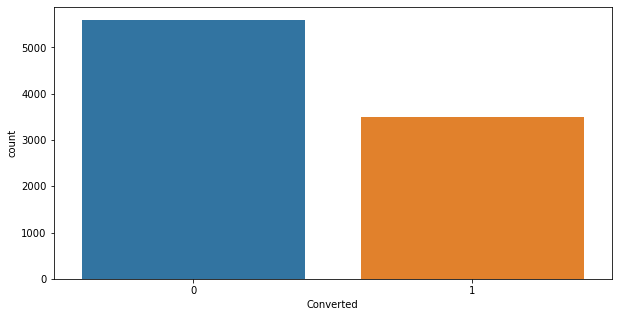

In [59]:
#countplot of the target column - Converted 
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x= "Converted", data=leads_base)
plt.show()

Inference: From the above plot Count of leads converted is less compared to others 

### 2.7.2 Bivariate Analysis
#### Lead Source vs Converted

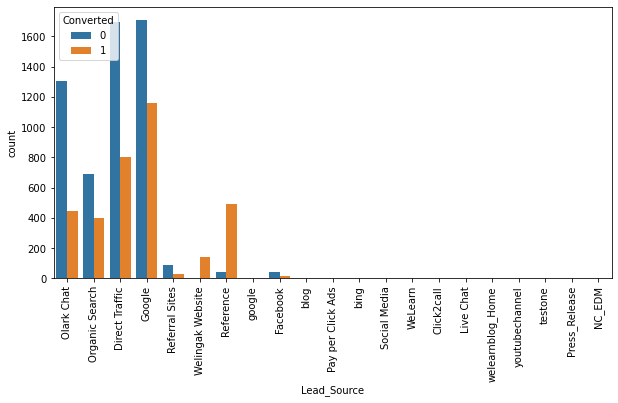

In [60]:
#Plotting the Converted variable against the Lead Source to determine which Sources contribute most to the Converted leads
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x="Lead_Source", hue="Converted", data=leads_base,orient='h' )
plt.xticks(rotation = 90)
plt.show()

Insights:leads converted through Google source and Direct traffic are more compared to the other sources and the converted ratio from 
the source references is following a different trend.Proportion of leads converted from source references is higher compared to all other categories. 

#### Specialization vs Converted

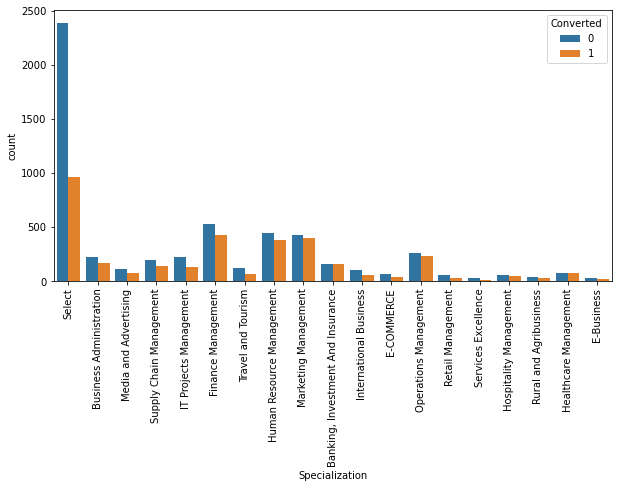

In [61]:
#Plotting Converted variable against the Specialization to check leads from which previous Specialization contribute most to the Converted leads
plt.subplots(figsize = (10,5))
sns.countplot(leads_base.Specialization,hue = leads_base.Converted)
plt.xticks(rotation = 90)
plt.show()

Insights: Overall across all specializations, Converted=0 is on the higher side compared Converted=1

#### Tags vs Converted

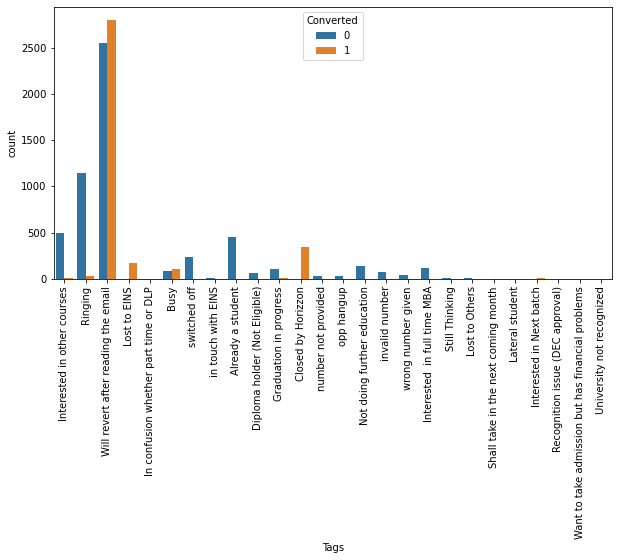

In [62]:
#Plotting the Converted variable against the Tags to check the current state of the lead and the conversion variable
plt.subplots(figsize = (10,5))
sns.countplot(leads_base['Tags'] ,hue = leads_base.Converted)
plt.xticks(rotation = 90)
plt.show()

Insights: Conversion ratio of leads for "will revert after reading the email" is more compared to other categories 

#### Lead Origin vs Converted

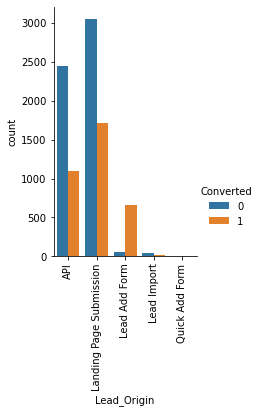

In [63]:
#Plotting the Converted variable against the Lead Origin to determine the relationship between the two variables
sns.catplot(x="Lead_Origin", hue="Converted",data=leads_base, kind="count",height=4, aspect=.7)
plt.xticks(rotation = 90)
plt.show()

Insights: Customers from Landing page submission have shown good conversion rate

#### How_did_you_hear_about_X_Education vs Converted

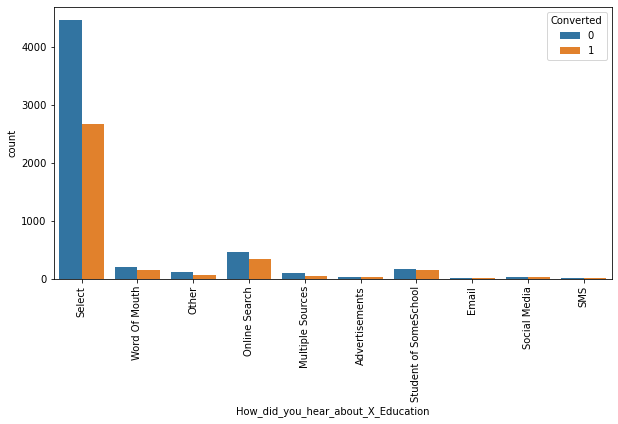

In [64]:
#Plotting against How did you hear about X Education and Converted
plt.subplots(figsize = (10,5))
sns.countplot('How_did_you_hear_about_X_Education',hue="Converted", data = leads_base)
plt.xticks(rotation = 90)
plt.show()

Insights: Most of the leads have not mentioned that how did they hear about X_Education and good amount of people recahed website through online sources

#### What_is_your_current_occupation vs Converted

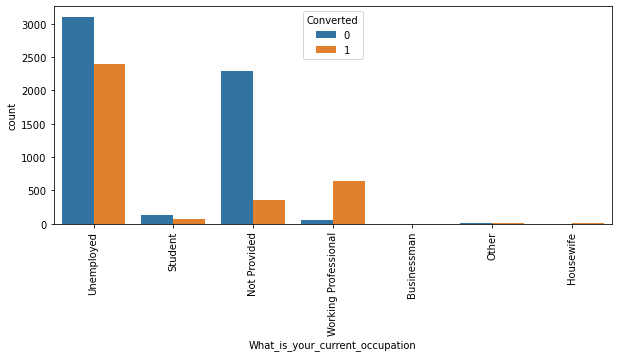

In [65]:
#Plotting the Converted variable against the How did you hear about X Education to determine the relationship between the two variables
plt.subplots(figsize = (10,4))
sns.countplot('What_is_your_current_occupation' ,hue="Converted",data=leads_base)
plt.xticks(rotation = 90)
plt.show()

Insight: Unemployed people converted more into leads,business man proportion is very bad in convertion

#### Other variables

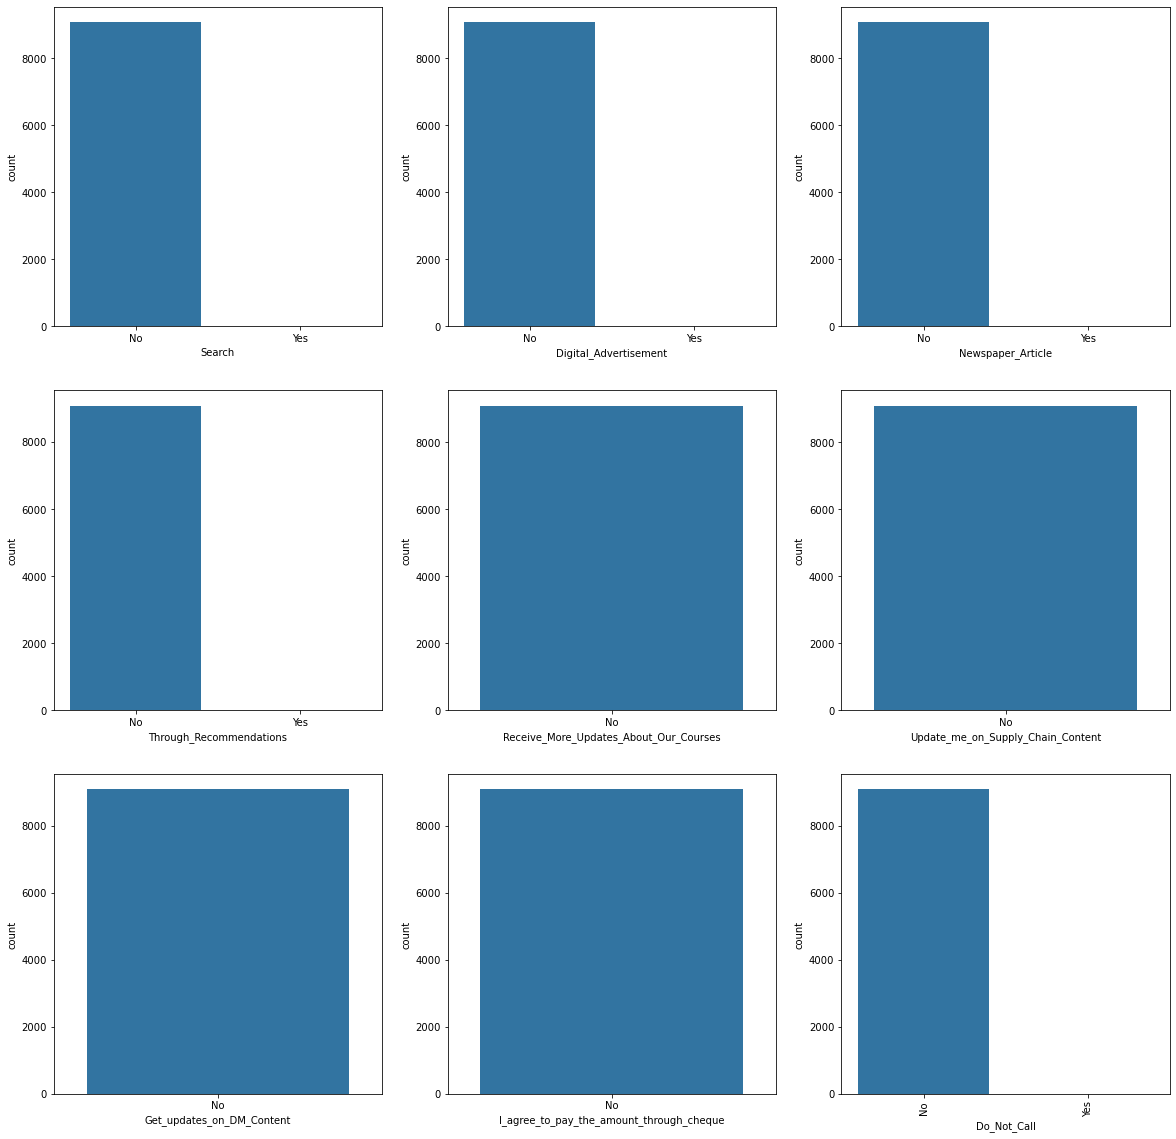

In [66]:
#Plotting countplots of other variables
plt.subplots(figsize = (20,20))
plt.subplot(3,3,1)
sns.countplot('Search' ,data = leads_base)

plt.subplot(3,3,2)
sns.countplot('Digital_Advertisement' ,data = leads_base)

plt.subplot(3,3,3)
sns.countplot('Newspaper_Article' ,data = leads_base)

plt.subplot(3,3,4)
sns.countplot('Through_Recommendations' ,data = leads_base)

plt.subplot(3,3,5)
sns.countplot('Receive_More_Updates_About_Our_Courses' ,data = leads_base)

plt.subplot(3,3,6)
sns.countplot('Update_me_on_Supply_Chain_Content' ,data = leads_base)

plt.subplot(3,3,7)
sns.countplot('Get_updates_on_DM_Content' ,data = leads_base)

plt.subplot(3,3,8)
sns.countplot('I_agree_to_pay_the_amount_through_cheque' ,data = leads_base)

plt.subplot(3,3,9)
sns.countplot('Do_Not_Call' ,data = leads_base)

plt.xticks(rotation = 90)
plt.show()

Insights: We can say that from all these categories leads are not converted i.e,based on the Search, Digital Advertisement, Newspaper Article, or Through Recommendations.

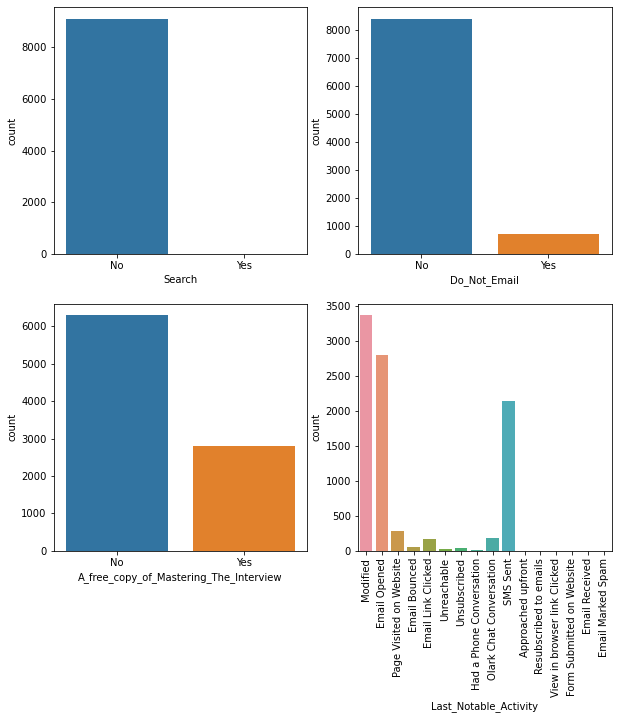

In [67]:
#Plotting countplots of other variables
plt.subplots(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot('Search' ,data = leads_base)

plt.subplot(2,2,2)
sns.countplot('Do_Not_Email' ,data = leads_base)

plt.subplot(2,2,3)
sns.countplot('A_free_copy_of_Mastering_The_Interview' ,data = leads_base)

plt.subplot(2,2,4)
sns.countplot('Last_Notable_Activity' ,data = leads_base)

plt.xticks(rotation = 90)
plt.show()

Insights: Relationship of variables with respect to the Converted column are shown above

### 2.7.3 Multivariate Analysis

<Figure size 1080x1080 with 0 Axes>

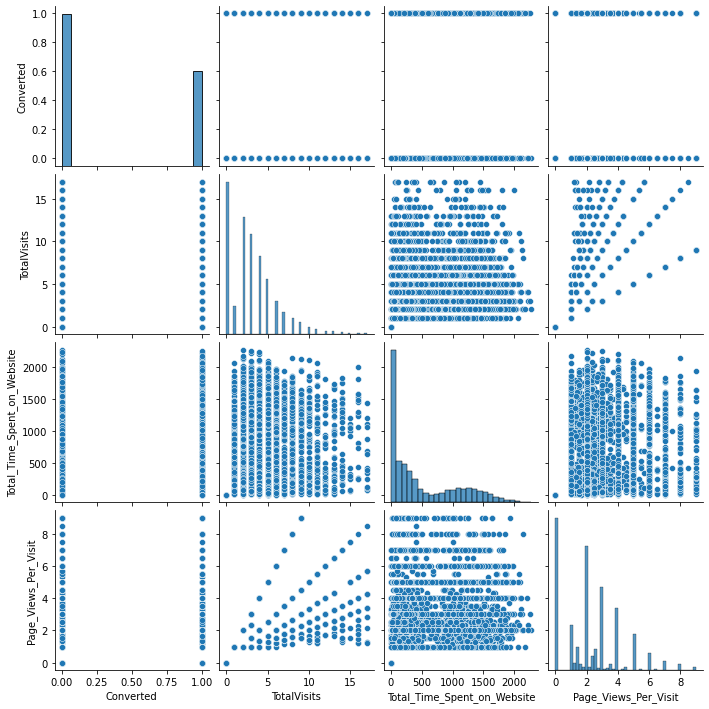

In [68]:
#Creating a pairplot to understand the correlation between the numerical variables
plt.figure(figsize = (15,15)) 
sns.pairplot(leads_base)
plt.show()

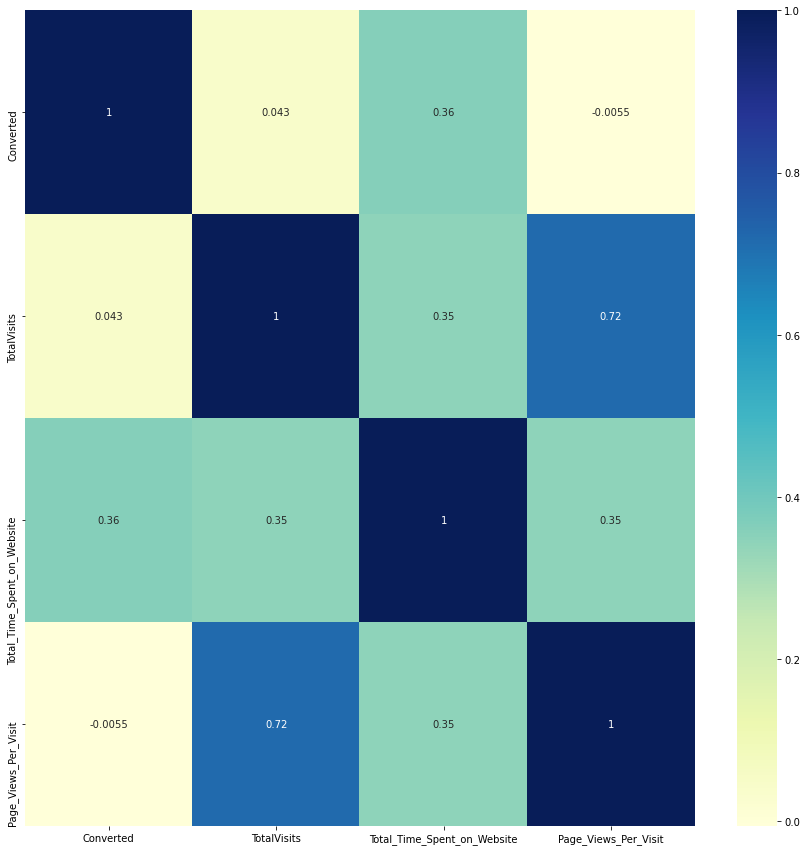

In [69]:
#Creating a heatmap to findthe correlation.
plt.figure(figsize = (15,15)) 
sns.heatmap(leads_base.corr(),annot = True,cmap="YlGnBu")
plt.show()

Insights : Total visits and Page view per visits have a strong correlation

## 2.8 Dropping some more columns
Based on the EDA analysis it is seen that many columns are not adding any information to the model, hence we can drop them before further analysis.

In [70]:
#Checking  the dataframe
leads_base.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,What_is_your_current_occupation,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Tags,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [71]:
#Checking the names of the columns
leads_base.columns

Index(['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call', 'Converted', 'TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity', 'Country', 'Specialization', 'How_did_you_hear_about_X_Education', 'What_is_your_current_occupation', 'Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper', 'Digital_Advertisement', 'Through_Recommendations', 'Receive_More_Updates_About_Our_Courses', 'Tags', 'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content', 'I_agree_to_pay_the_amount_through_cheque', 'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'], dtype='object')

In [72]:
#Dropping the columns that do not have any impact on the Converted target variable
leads_base = leads_base.drop(['Do_Not_Email', 'Do_Not_Call','Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums',
       'Newspaper', 'Digital_Advertisement', 'Through_Recommendations','Receive_More_Updates_About_Our_Courses',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content','Tags',
       'I_agree_to_pay_the_amount_through_cheque'],axis = 1)

In [73]:
#Checking the columns after dropping the unnecessary columns
leads_base.columns

Index(['Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit', 'Last_Activity', 'Country', 'Specialization', 'How_did_you_hear_about_X_Education', 'What_is_your_current_occupation', 'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'], dtype='object')

In [74]:
#Checking the head of the dataframe
leads_base.head()

,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,What_is_your_current_occupation,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,No,Modified


In [75]:
#Checking the shape of the dataframe
leads_base.shape

(9090, 13)

## 2.9 Data Preparation
### Creating dummies for categorical columns using one hot encoding

In [76]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_base[['Lead_Origin', 'Lead_Source', 
'Last_Activity', 'Country','Specialization','How_did_you_hear_about_X_Education',
'What_is_your_current_occupation', 'A_free_copy_of_Mastering_The_Interview','Last_Notable_Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_base = pd.concat([leads_base, dummy1], axis=1)

In [77]:
# Dropping the repeated columns
# We have created dummies for the below variables, so we can drop them
leads_base = leads_base.drop(['Lead_Origin', 'Lead_Source', 
'Last_Activity', 'Country','Specialization','How_did_you_hear_about_X_Education','What_is_your_current_occupation',
'A_free_copy_of_Mastering_The_Interview','Last_Notable_Activity'], 1)

In [78]:
leads_base.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How_did_you_hear_about_X_Education_Email,How_did_you_hear_about_X_Education_Multiple Sources,How_did_you_hear_about_X_Education_Online Search,How_did_you_hear_about_X_Education_Other,How_did_you_hear_about_X_Education_SMS,How_did_you_hear_about_X_Education_Select,How_did_you_hear_about_X_Education_Social Media,How_did_you_hear_about_X_Education_Student of SomeSchool,How_did_you_hear_about_X_Education_Word Of Mouth,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Not Provided,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,A_free_copy_of_Mastering_The_Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [79]:
leads_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Columns: 130 entries, Converted to Last_Notable_Activity_View in browser link Clicked
dtypes: float64(2), int64(2), uint8(126)
memory usage: 1.8 MB


# 3. Test Train Split

In [80]:
leads_base.shape

(9090, 130)

In [81]:
#Removing the target variable from the dataframe and saving it to new dataframe X, for the modeling
X = leads_base.drop(['Converted'],axis = 1)
X.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How_did_you_hear_about_X_Education_Email,How_did_you_hear_about_X_Education_Multiple Sources,How_did_you_hear_about_X_Education_Online Search,How_did_you_hear_about_X_Education_Other,How_did_you_hear_about_X_Education_SMS,How_did_you_hear_about_X_Education_Select,How_did_you_hear_about_X_Education_Social Media,How_did_you_hear_about_X_Education_Student of SomeSchool,How_did_you_hear_about_X_Education_Word Of Mouth,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Not Provided,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,A_free_copy_of_Mastering_The_Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0

In [82]:
X.shape

(9090, 129)

In [83]:
#Saving the target variable into a new dataframe Y
Y = leads_base['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
#Splitting the dataframes X and Y into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [85]:
#Verifying the head of the X_train dataframe
X_train.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How_did_you_hear_about_X_Education_Email,How_did_you_hear_about_X_Education_Multiple Sources,How_did_you_hear_about_X_Education_Online Search,How_did_you_hear_about_X_Education_Other,How_did_you_hear_about_X_Education_SMS,How_did_you_hear_about_X_Education_Select,How_did_you_hear_about_X_Education_Social Media,How_did_you_hear_about_X_Education_Student of SomeSchool,How_did_you_hear_about_X_Education_Word Of Mouth,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Not Provided,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,A_free_copy_of_Mastering_The_Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
4083,2.0,335,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,

In [86]:
#Verifying the head of the Y_train dataframe
Y_train.head()

4083    0
7309    0
7613    0
8659    0
8829    0
Name: Converted, dtype: int64

In [87]:
#Checking the X_test dataframe
X_test.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How_did_you_hear_about_X_Education_Email,How_did_you_hear_about_X_Education_Multiple Sources,How_did_you_hear_about_X_Education_Online Search,How_did_you_hear_about_X_Education_Other,How_did_you_hear_about_X_Education_SMS,How_did_you_hear_about_X_Education_Select,How_did_you_hear_about_X_Education_Social Media,How_did_you_hear_about_X_Education_Student of SomeSchool,How_did_you_hear_about_X_Education_Word Of Mouth,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Not Provided,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,A_free_copy_of_Mastering_The_Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
3343,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,

# 4. Feature scaling

In [88]:

scaler = StandardScaler()

X_train[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']])

X_train.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_google,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How_did_you_hear_about_X_Education_Email,How_did_you_hear_about_X_Education_Multiple Sources,How_did_you_hear_about_X_Education_Online Search,How_did_you_hear_about_X_Education_Other,How_did_you_hear_about_X_Education_SMS,How_did_you_hear_about_X_Education_Select,How_did_you_hear_about_X_Education_Social Media,How_did_you_hear_about_X_Education_Student of SomeSchool,How_did_you_hear_about_X_Education_Word Of Mouth,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Not Provided,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,A_free_copy_of_Mastering_The_Interview_Yes,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
4083,-0.395780,-0.270045,-0.138342,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [89]:
#checking converted rate
converted_Rate = (sum(leads_base['Converted'])/len(leads_base['Converted']))*100
converted_Rate

38.448844884488445

Inference: Only 38% leads are successfully converted in the given dataframe

# 5. Model building

## 1st Model

In [90]:
# Logistic regression model
logm1 = sm.GLM(Y_train,sm.add_constant(X_train), family=sm.families.Binomial())

In [91]:
#Checking the summary of the GLM Regression
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7148
Model Family:                Binomial   Df Model:                          123
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Mar 2021   Deviance:                          nan
Time:                        09:39:13   Pearson chi2:                 8.19e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     3.549e+15   8.17e+07   4.34e+07      0.000    3.55e+15    3.55e+15
TotalVisits                                               3.439e+13   1.23e+06   2.79e+07      0.000    3.44e+13    3.44e+13
Total_Time_Spent_on_Website                              -2.091e+13   8.87e+05  -2.36e+07      0.000   -2.09e+13   -2.09e+13
Page_Views_Per_Visit                                      1.075e+14   1.32e+06   8.13e+07      0.000    1.07e+14    1.07e+14
Lead_Origin_Landing Page Submission                      -2.907e+14   3.28e+06  -8.87e+07      0.000   -2.91e+14   -2.91e+14
Lead_Origin_Lead Add Form                                -3.107e+14   1.27e+07  -2.44e+07      0.000   -3.11e+14   -3.11e+14
Lead_Origin_Lead Import                                   3.467e+15   7.06e+07   4.91e+07      0.000    3.47e+15    3.47e+15
Lead_Origin_Quick Add Form                                6.484e+15   6.84e+07   9.48e+07      0.000    6.48e+15    6.48e+15
Lead_Source_Direct Traffic                               -2.015e+15    4.1e+07  -4.91e+07      0.000   -2.02e+15   -2.02e+15
Lead_Source_Facebook                                      -6.12e+15    8.1e+07  -7.55e+07      0.000   -6.12e+15   -6.12e+15
Lead_Source_Google                                       -1.834e+15   4.09e+07  -4.49e+07      0.000   -1.83e+15   -1.83e+15
Lead_Source_Live Chat                                     2.736e+15   6.14e+07   4.45e+07      0.000    2.74e+15    2.74e+15
Lead_Source_NC_EDM                                        2.159e+15   7.92e+07   2.72e+07      0.000    2.16e+15    2.16e+15
Lead_Source_Olark Chat                                   -9.983e+14   4.11e+07  -2.43e+07      0.000   -9.98e+14   -9.98e+14
Lead_Source_Organic Search                               -1.965e+15    4.1e+07  -4.79e+07      0.000   -1.96e+15   -1.96e+15
Lead_Source_Pay per Click Ads                            -5.938e+15   7.87e+07  -7.55e+07      0.000   -5.94e+15   -5.94e+15
Lead_Source_Press_Release                                 -5.61e+15   7.89e+07  -7.11e+07      0.000   -5.61e+15   -5.61e+15
Lead_Source_Reference                                    -7.091e+14    3.9e+07  -1.82e+07      0.000   -7.09e+14   -7.09e+14
Lead_Source_Referral Sites                               -1.603e+15    4.1e+07  -3.91e+07      0.000    -1.6e+15    -1.6e+15
Lead_Source_Social Media                                 -5.598e+14   6.28e+07  -8.91e+06      0.000    -5.6e+14    -5.6e+14
Lead_Source_WeLearn                                      -2.391e+06      0.107  -2.23e+07      0.000   -2.39e+06   -2.39e+06
Lead_Source_Welingak Website                             -7.544e+14   3.94e+07  -1.

## Feature selection using RFE

In [92]:
#Using logistic regression function
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [93]:
#Importing RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 18)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, Y_train)

In [94]:
#Checking the RFE support array
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False,

In [95]:
#Printing the columns not selected
X_train.columns[~ rfe.support_]

Index(['TotalVisits', 'Page_Views_Per_Visit', 'Lead_Origin_Lead Import', 'Lead_Origin_Quick Add Form', 'Lead_Source_Direct Traffic', 'Lead_Source_Facebook', 'Lead_Source_Google', 'Lead_Source_Live Chat', 'Lead_Source_NC_EDM', 'Lead_Source_Organic Search',
       ...
       'Last_Notable_Activity_Email Marked Spam', 'Last_Notable_Activity_Email Opened', 'Last_Notable_Activity_Email Received', 'Last_Notable_Activity_Form Submitted on Website', 'Last_Notable_Activity_Modified', 'Last_Notable_Activity_Olark Chat Conversation', 'Last_Notable_Activity_Page Visited on Website', 'Last_Notable_Activity_Resubscribed to emails', 'Last_Notable_Activity_Unsubscribed', 'Last_Notable_Activity_View in browser link Clicked'], dtype='object', length=111)

In [96]:
#Saving the selected feature list in the col variable
cols = X_train.columns[rfe.support_]

In [97]:
#Printing the selected feature list in saved in the col variable
cols

Index(['Total_Time_Spent_on_Website', 'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced', 'Last_Activity_Olark Chat Conversation', 'Last_Activity_Resubscribed to emails', 'Country_Italy', 'Country_Nigeria', 'Country_Saudi Arabia', 'Specialization_Select', 'What_is_your_current_occupation_Housewife', 'What_is_your_current_occupation_Not Provided', 'What_is_your_current_occupation_Working Professional', 'Last_Notable_Activity_Had a Phone Conversation', 'Last_Notable_Activity_SMS Sent', 'Last_Notable_Activity_Unreachable'], dtype='object')

### Rebuilding - Model 2 

In [98]:
#Checking the model details
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial()) 
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7253
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2947.1
Date:                Mon, 08 Mar 2021   Deviance:                       5894.3
Time:                        09:39:24   Pearson chi2:                 7.22e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3322      0.116     -2.863      0.004      -0.560      -0.105
Total_Time_Spent_on_Website                              1.0972      0.038     29.041      0.000       1.023       1.171
Lead_Origin_Landing Page Submission                     -0.9160      0.120     -7.644      0.000      -1.151      -0.681
Lead_Origin_Lead Add Form                                2.8327      0.191     14.861      0.000       2.459       3.206
Lead_Source_Olark Chat                                   1.1717      0.115     10.154      0.000       0.946       1.398
Lead_Source_Welingak Website                             2.7910      0.742      3.759      0.000       1.336       4.246
Last_Activity_Email Bounced                             -1.8238      0.283     -6.450      0.000      -2.378      -1.270
Last_Activity_Olark Chat Conversation                   -1.3659      0.158     -8.655      0.000      -1.675      -1.057
Last_Activity_Resubscribed to emails                    25.6414   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Country_Italy                                          -24.9461   4.25e+04     -0.001      1.000   -8.33e+04    8.33e+04
Country_Nigeria                                        -23.1136    3.3e+04     -0.001      0.999   -6.46e+04    6.46e+04
Country_Saudi Arabia                                    -1.9185      0.870     -2.206      0.027      -3.623      -0.214
Specialization_Select                                   -0.8351      0.114     -7.296      0.000      -1.059      -0.611
What_is_your_current_occupation_Housewife               23.8687   2.49e+04      0.001      0.999   -4.87e+04    4.87e+04
What_is_your_current_occupation_Not Provided            -1.1129      0.084    -13.233      0.000      -1.278      -0.948
What_is_your_current_occupation_Working Professional     2.2010      0.169     13.013      0.000       1.869       2.532
Last_Notable_Activity_Had a Phone Conversation           2.8709      1.200      2.393      0.017       0.520       5.222
Last_Notable_Activity_SMS Sent                           1.4924      0.075     19.983      0.000       1.346       1.639
Last_Notable_Activity_Unreachable                        1.9077      0.527      3.619      0.000       0.875       2.941
========================================================================================================================
"""

some of the columns are having p value more than 0.05 , so let us check VIF and drop the columns

In [99]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_Select,2.20
3,Lead_Source_Olark Chat,2.06
13,What_is_your_current_occupation_Not Provided,1.62
1,Lead_Origin_Landing Page Submission,1.54
2,Lead_Origin_Lead Add Form,1.49
6,Last_Activity_Olark Chat Conversation,1.46
16,Last_Notable_Activity_SMS Sent,1.41
4,Lead_Source_Welingak Website,1.32
0,Total_Time_Spent_on_Website,1.25
14,What_is_your_current_occupation_Working Profes...,1.19


#### Dropping the column Last Activity_Resubscribed to emails

In [100]:
#Dropping the column Last Activity_Resubscribed to emails as P value is >5% and VIF is 'inf'
cols = cols.drop('Last_Activity_Resubscribed to emails')
cols

Index(['Total_Time_Spent_on_Website', 'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced', 'Last_Activity_Olark Chat Conversation', 'Country_Italy', 'Country_Nigeria', 'Country_Saudi Arabia', 'Specialization_Select', 'What_is_your_current_occupation_Housewife', 'What_is_your_current_occupation_Not Provided', 'What_is_your_current_occupation_Working Professional', 'Last_Notable_Activity_Had a Phone Conversation', 'Last_Notable_Activity_SMS Sent', 'Last_Notable_Activity_Unreachable'], dtype='object')

### Rebuilding - Model 3

In [101]:
#Checking the model details
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial()) 
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7254
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.3
Date:                Mon, 08 Mar 2021   Deviance:                       5898.7
Time:                        09:39:24   Pearson chi2:                 7.22e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3337      0.116     -2.876      0.004      -0.561      -0.106
Total_Time_Spent_on_Website                              1.0969      0.038     29.039      0.000       1.023       1.171
Lead_Origin_Landing Page Submission                     -0.9146      0.120     -7.634      0.000      -1.149      -0.680
Lead_Origin_Lead Add Form                                2.8335      0.191     14.866      0.000       2.460       3.207
Lead_Source_Olark Chat                                   1.1765      0.115     10.201      0.000       0.950       1.402
Lead_Source_Welingak Website                             2.7904      0.742      3.758      0.000       1.335       4.246
Last_Activity_Email Bounced                             -1.8251      0.283     -6.456      0.000      -2.379      -1.271
Last_Activity_Olark Chat Conversation                   -1.3700      0.158     -8.685      0.000      -1.679      -1.061
Country_Italy                                          -24.9443   4.25e+04     -0.001      1.000   -8.33e+04    8.33e+04
Country_Nigeria                                        -23.1126    3.3e+04     -0.001      0.999   -6.47e+04    6.46e+04
Country_Saudi Arabia                                    -1.9192      0.870     -2.206      0.027      -3.624      -0.214
Specialization_Select                                   -0.8334      0.114     -7.283      0.000      -1.058      -0.609
What_is_your_current_occupation_Housewife               23.8688   2.49e+04      0.001      0.999   -4.87e+04    4.87e+04
What_is_your_current_occupation_Not Provided            -1.1087      0.084    -13.199      0.000      -1.273      -0.944
What_is_your_current_occupation_Working Professional     2.2013      0.169     13.016      0.000       1.870       2.533
Last_Notable_Activity_Had a Phone Conversation           2.8698      1.199      2.393      0.017       0.520       5.220
Last_Notable_Activity_SMS Sent                           1.4909      0.075     19.969      0.000       1.345       1.637
Last_Notable_Activity_Unreachable                        1.9048      0.527      3.615      0.000       0.872       2.937
========================================================================================================================
"""

#### Dropping Country_Italy

In [102]:
# Checking VIF before dropping Country_Italy
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Select,2.20
3,Lead_Source_Olark Chat,2.06
12,What_is_your_current_occupation_Not Provided,1.62
1,Lead_Origin_Landing Page Submission,1.54
2,Lead_Origin_Lead Add Form,1.49
6,Last_Activity_Olark Chat Conversation,1.46
15,Last_Notable_Activity_SMS Sent,1.41
4,Lead_Source_Welingak Website,1.32
0,Total_Time_Spent_on_Website,1.25
13,What_is_your_current_occupation_Working Profes...,1.19


In [103]:
# dropping Country_Italy
cols = cols.drop('Country_Italy')

### Rebuilding - Model 4

In [104]:
#Checking the details of the model
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7255
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2952.2
Date:                Mon, 08 Mar 2021   Deviance:                       5904.4
Time:                        09:39:24   Pearson chi2:                 7.22e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3327      0.116     -2.869      0.004      -0.560      -0.105
Total_Time_Spent_on_Website                              1.0946      0.038     29.013      0.000       1.021       1.169
Lead_Origin_Landing Page Submission                     -0.9151      0.120     -7.642      0.000      -1.150      -0.680
Lead_Origin_Lead Add Form                                2.8316      0.191     14.861      0.000       2.458       3.205
Lead_Source_Olark Chat                                   1.1747      0.115     10.194      0.000       0.949       1.401
Lead_Source_Welingak Website                             2.7901      0.742      3.758      0.000       1.335       4.245
Last_Activity_Email Bounced                             -1.8244      0.283     -6.455      0.000      -2.378      -1.270
Last_Activity_Olark Chat Conversation                   -1.3703      0.158     -8.690      0.000      -1.679      -1.061
Country_Nigeria                                        -22.1086      2e+04     -0.001      0.999   -3.92e+04    3.92e+04
Country_Saudi Arabia                                    -1.9160      0.870     -2.204      0.028      -3.620      -0.212
Specialization_Select                                   -0.8335      0.114     -7.286      0.000      -1.058      -0.609
What_is_your_current_occupation_Housewife               22.8679   1.51e+04      0.002      0.999   -2.95e+04    2.96e+04
What_is_your_current_occupation_Not Provided            -1.1081      0.084    -13.201      0.000      -1.273      -0.944
What_is_your_current_occupation_Working Professional     2.2018      0.169     13.023      0.000       1.870       2.533
Last_Notable_Activity_Had a Phone Conversation           2.8687      1.199      2.393      0.017       0.519       5.218
Last_Notable_Activity_SMS Sent                           1.4863      0.075     19.926      0.000       1.340       1.633
Last_Notable_Activity_Unreachable                        1.9036      0.527      3.614      0.000       0.871       2.936
========================================================================================================================
"""

#### Dropping Country_Nigeria

In [105]:
# Checking VIF before dropping Country_Nigeria
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Select,2.20
3,Lead_Source_Olark Chat,2.06
11,What_is_your_current_occupation_Not Provided,1.62
1,Lead_Origin_Landing Page Submission,1.54
2,Lead_Origin_Lead Add Form,1.49
6,Last_Activity_Olark Chat Conversation,1.46
14,Last_Notable_Activity_SMS Sent,1.41
4,Lead_Source_Welingak Website,1.32
0,Total_Time_Spent_on_Website,1.25
12,What_is_your_current_occupation_Working Profes...,1.19


In [106]:
# dropping Country_Nigeria
cols = cols.drop('Country_Nigeria')

### Rebuilding - Model 5

In [107]:
#Checking the summary
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7256
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2954.2
Date:                Mon, 08 Mar 2021   Deviance:                       5908.4
Time:                        09:39:24   Pearson chi2:                 7.22e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3327      0.116     -2.869      0.004      -0.560      -0.105
Total_Time_Spent_on_Website                              1.0942      0.038     29.014      0.000       1.020       1.168
Lead_Origin_Landing Page Submission                     -0.9171      0.120     -7.659      0.000      -1.152      -0.682
Lead_Origin_Lead Add Form                                2.8315      0.191     14.861      0.000       2.458       3.205
Lead_Source_Olark Chat                                   1.1743      0.115     10.192      0.000       0.948       1.400
Lead_Source_Welingak Website                             2.7899      0.742      3.758      0.000       1.335       4.245
Last_Activity_Email Bounced                             -1.8234      0.283     -6.452      0.000      -2.377      -1.269
Last_Activity_Olark Chat Conversation                   -1.3705      0.158     -8.691      0.000      -1.680      -1.061
Country_Saudi Arabia                                    -1.9140      0.870     -2.201      0.028      -3.618      -0.210
Specialization_Select                                   -0.8331      0.114     -7.284      0.000      -1.057      -0.609
What_is_your_current_occupation_Housewife               22.8695   1.51e+04      0.002      0.999   -2.95e+04    2.96e+04
What_is_your_current_occupation_Not Provided            -1.1068      0.084    -13.188      0.000      -1.271      -0.942
What_is_your_current_occupation_Working Professional     2.2036      0.169     13.035      0.000       1.872       2.535
Last_Notable_Activity_Had a Phone Conversation           2.8697      1.199      2.394      0.017       0.520       5.219
Last_Notable_Activity_SMS Sent                           1.4845      0.075     19.913      0.000       1.338       1.631
Last_Notable_Activity_Unreachable                        1.9039      0.527      3.615      0.000       0.872       2.936
========================================================================================================================
"""

#### Dropping What_is_your_current_occupation_Housewife

In [108]:
# Checking VIF before dropping What_is_your_current_occupation_Housewife
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Select,2.20
3,Lead_Source_Olark Chat,2.06
10,What_is_your_current_occupation_Not Provided,1.62
1,Lead_Origin_Landing Page Submission,1.54
2,Lead_Origin_Lead Add Form,1.49
6,Last_Activity_Olark Chat Conversation,1.46
13,Last_Notable_Activity_SMS Sent,1.41
4,Lead_Source_Welingak Website,1.32
0,Total_Time_Spent_on_Website,1.25
11,What_is_your_current_occupation_Working Profes...,1.19


In [109]:
#Dropping the occupation Housewife
cols = cols.drop('What_is_your_current_occupation_Housewife')

### Rebuilding - Model 6 - Final

In [110]:
#Checking the summary of the model once before proceeding further with the analysis
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7257
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2959.5
Date:                Mon, 08 Mar 2021   Deviance:                       5919.0
Time:                        09:39:25   Pearson chi2:                 7.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3270      0.116     -2.824      0.005      -0.554      -0.100
Total_Time_Spent_on_Website                              1.0936      0.038     29.027      0.000       1.020       1.167
Lead_Origin_Landing Page Submission                     -0.9153      0.120     -7.653      0.000      -1.150      -0.681
Lead_Origin_Lead Add Form                                2.8340      0.190     14.885      0.000       2.461       3.207
Lead_Source_Olark Chat                                   1.1732      0.115     10.187      0.000       0.947       1.399
Lead_Source_Welingak Website                             2.7852      0.742      3.751      0.000       1.330       4.240
Last_Activity_Email Bounced                             -1.8280      0.283     -6.469      0.000      -2.382      -1.274
Last_Activity_Olark Chat Conversation                   -1.3726      0.158     -8.705      0.000      -1.682      -1.064
Country_Saudi Arabia                                    -1.9168      0.869     -2.205      0.027      -3.621      -0.213
Specialization_Select                                   -0.8360      0.114     -7.314      0.000      -1.060      -0.612
What_is_your_current_occupation_Not Provided            -1.1101      0.084    -13.234      0.000      -1.275      -0.946
What_is_your_current_occupation_Working Professional     2.1981      0.169     13.005      0.000       1.867       2.529
Last_Notable_Activity_Had a Phone Conversation           2.8640      1.199      2.389      0.017       0.514       5.214
Last_Notable_Activity_SMS Sent                           1.4794      0.075     19.857      0.000       1.333       1.625
Last_Notable_Activity_Unreachable                        1.9000      0.527      3.607      0.000       0.868       2.933
========================================================================================================================
"""

Inference: 'res' has no p-value of the variables abover 5%

In [111]:
# Getting the predicted values on the train set
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

4083    0.176887
7309    0.037753
7613    0.049037
8659    0.103771
8829    0.108309
3918    0.515090
5572    0.031186
1461    0.033649
3777    0.793846
4552    0.278202
dtype: float64

In [112]:
# adding probability of 'Converted' column
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_Prob':Y_train_pred})
Y_train_pred_final.sort_values(by=['Converted_Prob'], inplace=True, ascending=False)
Y_train_pred_final.head()

,Converted,Converted_Prob
7219,1,0.999318
2656,1,0.999235
8293,1,0.999191
3478,1,0.999181
8074,1,0.999119


In [113]:
#Finding the optimal cutoff point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7219,1,0.999318,1,1,1,1,1,1,1,1,1,1
2656,1,0.999235,1,1,1,1,1,1,1,1,1,1
8293,1,0.999191,1,1,1,1,1,1,1,1,1,1
3478,1,0.999181,1,1,1,1,1,1,1,1,1,1
8074,1,0.999119,1,1,1,1,1,1,1,1,1,1


# 6. Model Evaluation

## 6.1 Metrics - Train set

In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_daf = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn import metrics

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_daf.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_daf)

     prob  accuracy     sensi     speci
0.0   0.0  0.384213  1.000000  0.000000
0.1   0.1  0.601348  0.981747  0.364002
0.2   0.2  0.765814  0.913386  0.673738
0.3   0.3  0.799505  0.846099  0.770433
0.4   0.4  0.811331  0.781675  0.829835
0.5   0.5  0.813256  0.699356  0.884323
0.6   0.6  0.805968  0.630637  0.915364
0.7   0.7  0.782316  0.516464  0.948191
0.8   0.8  0.760864  0.429850  0.967396
0.9   0.9  0.711496  0.267001  0.988834


Insight - At 0.4 we can see that we have the best values.

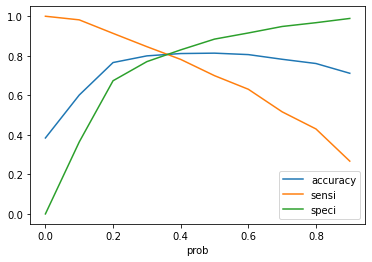

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_daf.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Insights : Plot shows  the appropriate values at 0.4

### 6.1.1 Creating a New Dataframe for Converted probability using cutoff 0.4

In [116]:
Y_train_pred_final['predicted'] = Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
Y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
7219,1,0.999318,1,1,1,1,1,1,1,1,1,1,1
2656,1,0.999235,1,1,1,1,1,1,1,1,1,1,1
8293,1,0.999191,1,1,1,1,1,1,1,1,1,1,1
3478,1,0.999181,1,1,1,1,1,1,1,1,1,1,1
8074,1,0.999119,1,1,1,1,1,1,1,1,1,1,1


In [117]:
Y_train_pred_final['lead_score'] = Y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
Y_train_pred_final.head(10)

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,lead_score
7219,1,0.999318,1,1,1,1,1,1,1,1,1,1,1,100
2656,1,0.999235,1,1,1,1,1,1,1,1,1,1,1,100
8293,1,0.999191,1,1,1,1,1,1,1,1,1,1,1,100
3478,1,0.999181,1,1,1,1,1,1,1,1,1,1,1,100
8074,1,0.999119,1,1,1,1,1,1,1,1,1,1,1,100
8120,1,0.998872,1,1,1,1,1,1,1,1,1,1,1,100
3428,1,0.998679,1,1,1,1,1,1,1,1,1,1,1,100
5921,1,0.998506,1,1,1,1,1,1,1,1,1,1,1,100
7579,1,0.998420,1,1,1,1,1,1,1,1,1,1,1,100
7234,1,0.998405,1,1,1,1,1,1,1,1,1,1,1,100


In [118]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted )
print(confusion)

[[3716  762]
 [ 610 2184]]


In [119]:
# overall accuracy.
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted))

0.8113311331133113


### 6.1.2 Checking VIF'S again

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values,i)for i in range (X_train[cols].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Select,2.20
3,Lead_Source_Olark Chat,2.06
9,What_is_your_current_occupation_Not Provided,1.62
1,Lead_Origin_Landing Page Submission,1.54
2,Lead_Origin_Lead Add Form,1.49
6,Last_Activity_Olark Chat Conversation,1.46
12,Last_Notable_Activity_SMS Sent,1.41
4,Lead_Source_Welingak Website,1.32
0,Total_Time_Spent_on_Website,1.25
10,What_is_your_current_occupation_Working Profes...,1.19


Insights:All variables are having good VIF values hence proceed with the same for modelling

### 6.1.3 Metrics beyond simply accuracy

In [121]:
#Calculating the 4 parameters
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7816750178954903

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.8298347476552033

In [124]:
# Calculate false postive rate - predicting conversion when customer are not converted
print(FP/ float(TN+FP))

0.1701652523447968


In [125]:
# positive predictive value 
print (TP / float(TP+FP))

0.7413441955193483


In [126]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8589921405455386


### 6.1.4 Plotting the ROC Curve

In [127]:
#Defining the draw_roc function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
#Calculating and saving values to fpr, tpr and thresholds
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob, drop_intermediate = False )

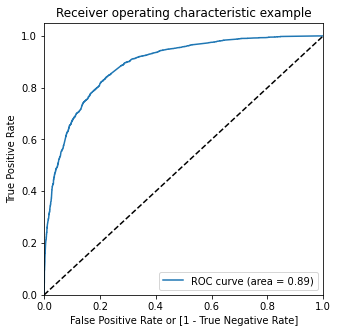

In [129]:
#Plotting the curve
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob)

### 6.1.5 Precision and Recall

In [130]:
# Pricision TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7413441955193483

In [131]:
# Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7816750178954903

In [132]:
#Calculation using precision_score
precision_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

0.7413441955193483

In [133]:
#Calculation using recall_score
recall_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

0.7816750178954903

### 6.1.6 Precision and Recall Tradeoff

In [134]:
#Calculating the p,r, and threshold values using the precision_recall_curve
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob)

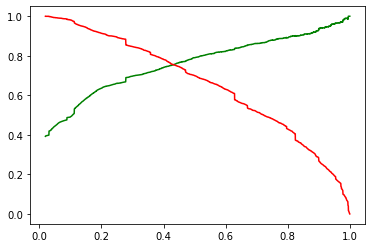

In [135]:
#Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 7. Making predictions on the Test set

In [136]:
#Using Scalar Trnsform on 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'
X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.transform(X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

In [137]:
#Using the selected columns to update the X_test dataframe
X_test = X_test[cols]
X_test.head()

,Total_Time_Spent_on_Website,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Olark Chat Conversation,Country_Saudi Arabia,Specialization_Select,What_is_your_current_occupation_Not Provided,What_is_your_current_occupation_Working Professional,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable
3343,-0.881153,0,0,1,0,0,0,0,1,0,0,0,0,0
2600,-0.625765,1,0,0,0,0,0,0,0,0,1,0,0,0
3115,-0.147824,1,0,0,0,0,0,0,0,1,0,0,0,0
1348,-0.881153,0,0,1,0,0,1,0,1,1,0,0,0,0
4525,2.221815,1,0,0,0,0,0,0,0,0,0,0,1,0


In [138]:
#Creating the new dataframes for the model
X_test_sm = sm.add_constant(X_test)

In [139]:
Y_test_pred = res.predict(X_test_sm)

In [140]:
Y_pred_1 = pd.DataFrame(Y_test_pred)

In [141]:
# Converting y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)

In [142]:
# Appending y_test_df and y_pred_1
Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)

In [143]:
Y_pred_final.head()

,Converted,0
3343,1,0.278202
2600,1,0.567468
3115,0,0.074880
1348,0,0.031186
4525,1,0.935047


In [144]:
# Renaming the column 
Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [145]:
Y_pred_final['final_predicted'] = Y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [146]:
Y_pred_final['lead_score'] = Y_pred_final.Converted_Prob.map(lambda x: round(x*100))
Y_pred_final.head(10)

,Converted,Converted_Prob,final_predicted,lead_score
3343,1,0.278202,0,28
2600,1,0.567468,1,57
3115,0,0.074880,0,7
1348,0,0.031186,0,3
4525,1,0.935047,1,94
461,0,0.052770,0,5
1079,1,0.939143,1,94
7339,0,0.031186,0,3
6291,0,0.120845,0,12
1672,0,0.081303,0,8


# 8. Metrics - Test set

In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted)

0.817931793179318

In [148]:
#Calculating and printing the Confusion Matrix
confusion2 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_predicted )
confusion2

array([[932, 185],
       [146, 555]])

In [149]:
#Printing the four parameters
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP2 / float(TP2+FN2)

0.7917261055634808

In [151]:
# Let us calculate specificity
TN2 / float(TN2+FP2)

0.8343777976723367

In [152]:
# positive predictive value 
print (TP2 / float(TP2+FP2))

0.75


In [153]:
# Negative predictive value
print (TN2 / float(TN2+ FN2))

0.8645640074211502


# 9. Conclusion: 
Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 83% which are approximately closer to the respective values calculated using trained set.
Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
Hence this seems to be a good model.